In [1]:
#This notebook is for analysis on the cBioPortal clinical data

#load in packages
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Levenshtein
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size':20})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import urllib, json
url = "http://www.cbioportal.org/api/studies"
response = urllib.urlopen(url)
studies = json.loads(response.read())

In [3]:
studyIDs=[]
for study in studies:
    studyIDs.append(study['studyId'])

In [51]:
studies=[]
study_attributes = []

for study in studyIDs:   # go through every study
    study = study.strip('\n')   # formating
    print(study + ' ')         # keep it in check
    string = 'http://cbioportal.org/api/studies/'+study+'/clinical-attributes'
    df = pd.read_json(string)   # create the dataframe
    if not df.empty:              
        studies.append((study,df))                  # append the dataframe to dataframes
        study_attributes.append((study,df['clinicalAttributeId'].tolist()))        # append

blca_dfarber_mskcc_2014 
brca_bccrc_xenograft_2014 
kirc_bgi 
chol_jhu_2013 
chol_nus_2012 
cscc_dfarber_2015 
desm_broad_2015 
escc_ucla_2014 
lihc_riken 
luad_mskcc_2015 
luad_tsp 
sclc_clcgp 
mbl_broad_2012 
mbl_icgc 
mbl_pcgp 
nbl_amc_2012 
npc_nusingapore 
paac_jhu_2014 
paad_utsw_2015 
pcnsl_mayo_2015 
rms_nih_2014 
brca_broad 
kich_tcga_pub 
coadread_genentech 
coadread_mskcc 
esca_broad 
es_iocurie_2014 
gbc_shanghai_2014 
lgg_ucsf_2014 
hnsc_broad 
lgggbm_tcga_pub 
sclc_ucologne_2015 
skcm_broad 
skcm_yale 
panet_jhu_2011 
prad_tcga_pub 
egc_tmucih_2015 
stad_utokyo 
tet_nci_2014 
ucs_jhu_2014 
blca_bgi 
brca_bccrc 
laml_tcga_pub 
brca_sanger 
cellline_ccle_broad 
chol_nccs_2013 
escc_icgc 
lihc_amc_prv 
skcm_broad_dfarber 
mm_broad 
cellline_nci60 
scco_mskcc 
hnsc_jhu 
mpnst_mskcc 
prad_mskcc_2014 
stad_pfizer_uhongkong 
stad_tcga_pub 
stad_uhongkong 
thyroid_mskcc_2016 
hnsc_tcga_pub 
luad_broad 
luad_tcga_pub 
nccrcc_genentech_2014 
prad_broad_2013 
prad_mich 
ucec_tcga_pu

In [170]:
study_names=[]
for study in study_attributes:
    study_names.append(study[0])

##check if attribute has multiple datatypes and list proportions

In [244]:
#check if attribute has multiple datatypes and list proportions
from collections import Counter
all_attributes=list(study_data_combined)
count=0
for attribute in all_attributes:
    count+=1
    studies_with_attribute=study_data_combined[study_data_combined[attribute]>0].index
    attribute_types=[]
    for study in studies_with_attribute:
        study_index=study_names.index(study)
        attribute_data=studies[study_index][1]
        attribute_type=attribute_data[attribute_data['clinicalAttributeId']==attribute]['datatype']
        attribute_types.append(attribute_type.get_values()[0])
    if len(set(attribute_types)) > 1:
        print attribute
        print Counter(attribute_types)
        #break

CELLULARITY
Counter({u'STRING': 2, u'NUMBER': 1})
CENT17_COPY_NUMBER
Counter({u'STRING': 1, u'NUMBER': 1})
DAYS_TO_LAST_FOLLOWUP
Counter({u'NUMBER': 30, u'STRING': 2})
GLEASON_SCORE_PERCENT_4_AND_5
Counter({u'STRING': 1, u'NUMBER': 1})
HER2_COPY_NUMBER
Counter({u'STRING': 1, u'NUMBER': 1})
INITIAL_PATHOLOGIC_DX_YEAR
Counter({u'NUMBER': 32, u'STRING': 1})
LYMPH_NODES_EXAMINED_HE_COUNT
Counter({u'NUMBER': 13, u'STRING': 1})
LYMPH_NODE_EXAMINED_COUNT
Counter({u'NUMBER': 17, u'STRING': 1})
WGS_BASED_PURITY_ESTIMATION
Counter({u'STRING': 1, u'NUMBER': 1})


##check if attribute has multiple types (sample vs patient) and list proportions

In [252]:
#check if attribute has multiple types (sample vs patient) and list proportions
sample_or_patient = {True:"patient", False:"sample"}
from collections import Counter
all_attributes=list(study_data_combined)
count=0
for attribute in all_attributes:
    count+=1
    studies_with_attribute=study_data_combined[study_data_combined[attribute]>0].index
    attribute_types=[]
    for study in studies_with_attribute:
        study_index=study_names.index(study)
        attribute_data=studies[study_index][1]
        attribute_type=attribute_data[attribute_data['clinicalAttributeId']==attribute]['patientAttribute']
        attribute_types.append(sample_or_patient[attribute_type.get_values()[0]])
    if len(set(attribute_types)) > 1:
        print attribute
        print Counter(attribute_types)
        #break

CELLULARITY
Counter({'patient': 2, 'sample': 1})
CENT17_COPY_NUMBER
Counter({'sample': 1, 'patient': 1})
DISEASE_CODE
Counter({'sample': 6, 'patient': 3})
ER_POSITIVITY_SCALE_OTHER
Counter({'sample': 1, 'patient': 1})
ER_POSITIVITY_SCALE_USED
Counter({'sample': 1, 'patient': 1})
ER_STATUS_BY_IHC
Counter({'sample': 2, 'patient': 1})
ER_STATUS_IHC_PERCENT_POSITIVE
Counter({'sample': 1, 'patient': 1})
FIRST_SURGICAL_PROCEDURE_OTHER
Counter({'sample': 1, 'patient': 1})
GRADE
Counter({'sample': 30, 'patient': 1})
HER2_AND_CENT17_CELLS_COUNT
Counter({'sample': 1, 'patient': 1})
HER2_AND_CENT17_SCALE_OTHER
Counter({'sample': 1, 'patient': 1})
HER2_CENT17_RATIO
Counter({'sample': 1, 'patient': 1})
HER2_COPY_NUMBER
Counter({'sample': 1, 'patient': 1})
HER2_FISH_METHOD
Counter({'sample': 1, 'patient': 1})
HER2_FISH_STATUS
Counter({'sample': 1, 'patient': 1})
HER2_IHC_PERCENT_POSITIVE
Counter({'sample': 1, 'patient': 1})
HER2_IHC_SCORE
Counter({'sample': 1, 'patient': 1})
HER2_POSITIVITY_METHOD_T

##Determine the number of common attributes between pairs of studies

In [283]:
study_names = list(study_data_combined.T)
n_studies = len(study_names)
n_common_attributes = pd.DataFrame(index=study_names, columns=study_names)
n_common_attributes = n_common_attributes.fillna(0.0)
n_attribute_dist = []
#n_common_attributes = np.zeros([n_studies, n_studies])

for i in range(n_studies):
    for j in range(n_studies):
        #n_common_attributes[i, j] = sum((study_data_combined.T[study_names[i]]>0) & (study_data_combined.T[study_names[j]]>0))
        n_attributes = sum((study_data_combined.T[study_names[i]]>0) & (study_data_combined.T[study_names[j]]>0))
        n_common_attributes.ix[i, study_names[j]] = n_attributes
        if j>i:
            n_attribute_dist.append(n_attributes)

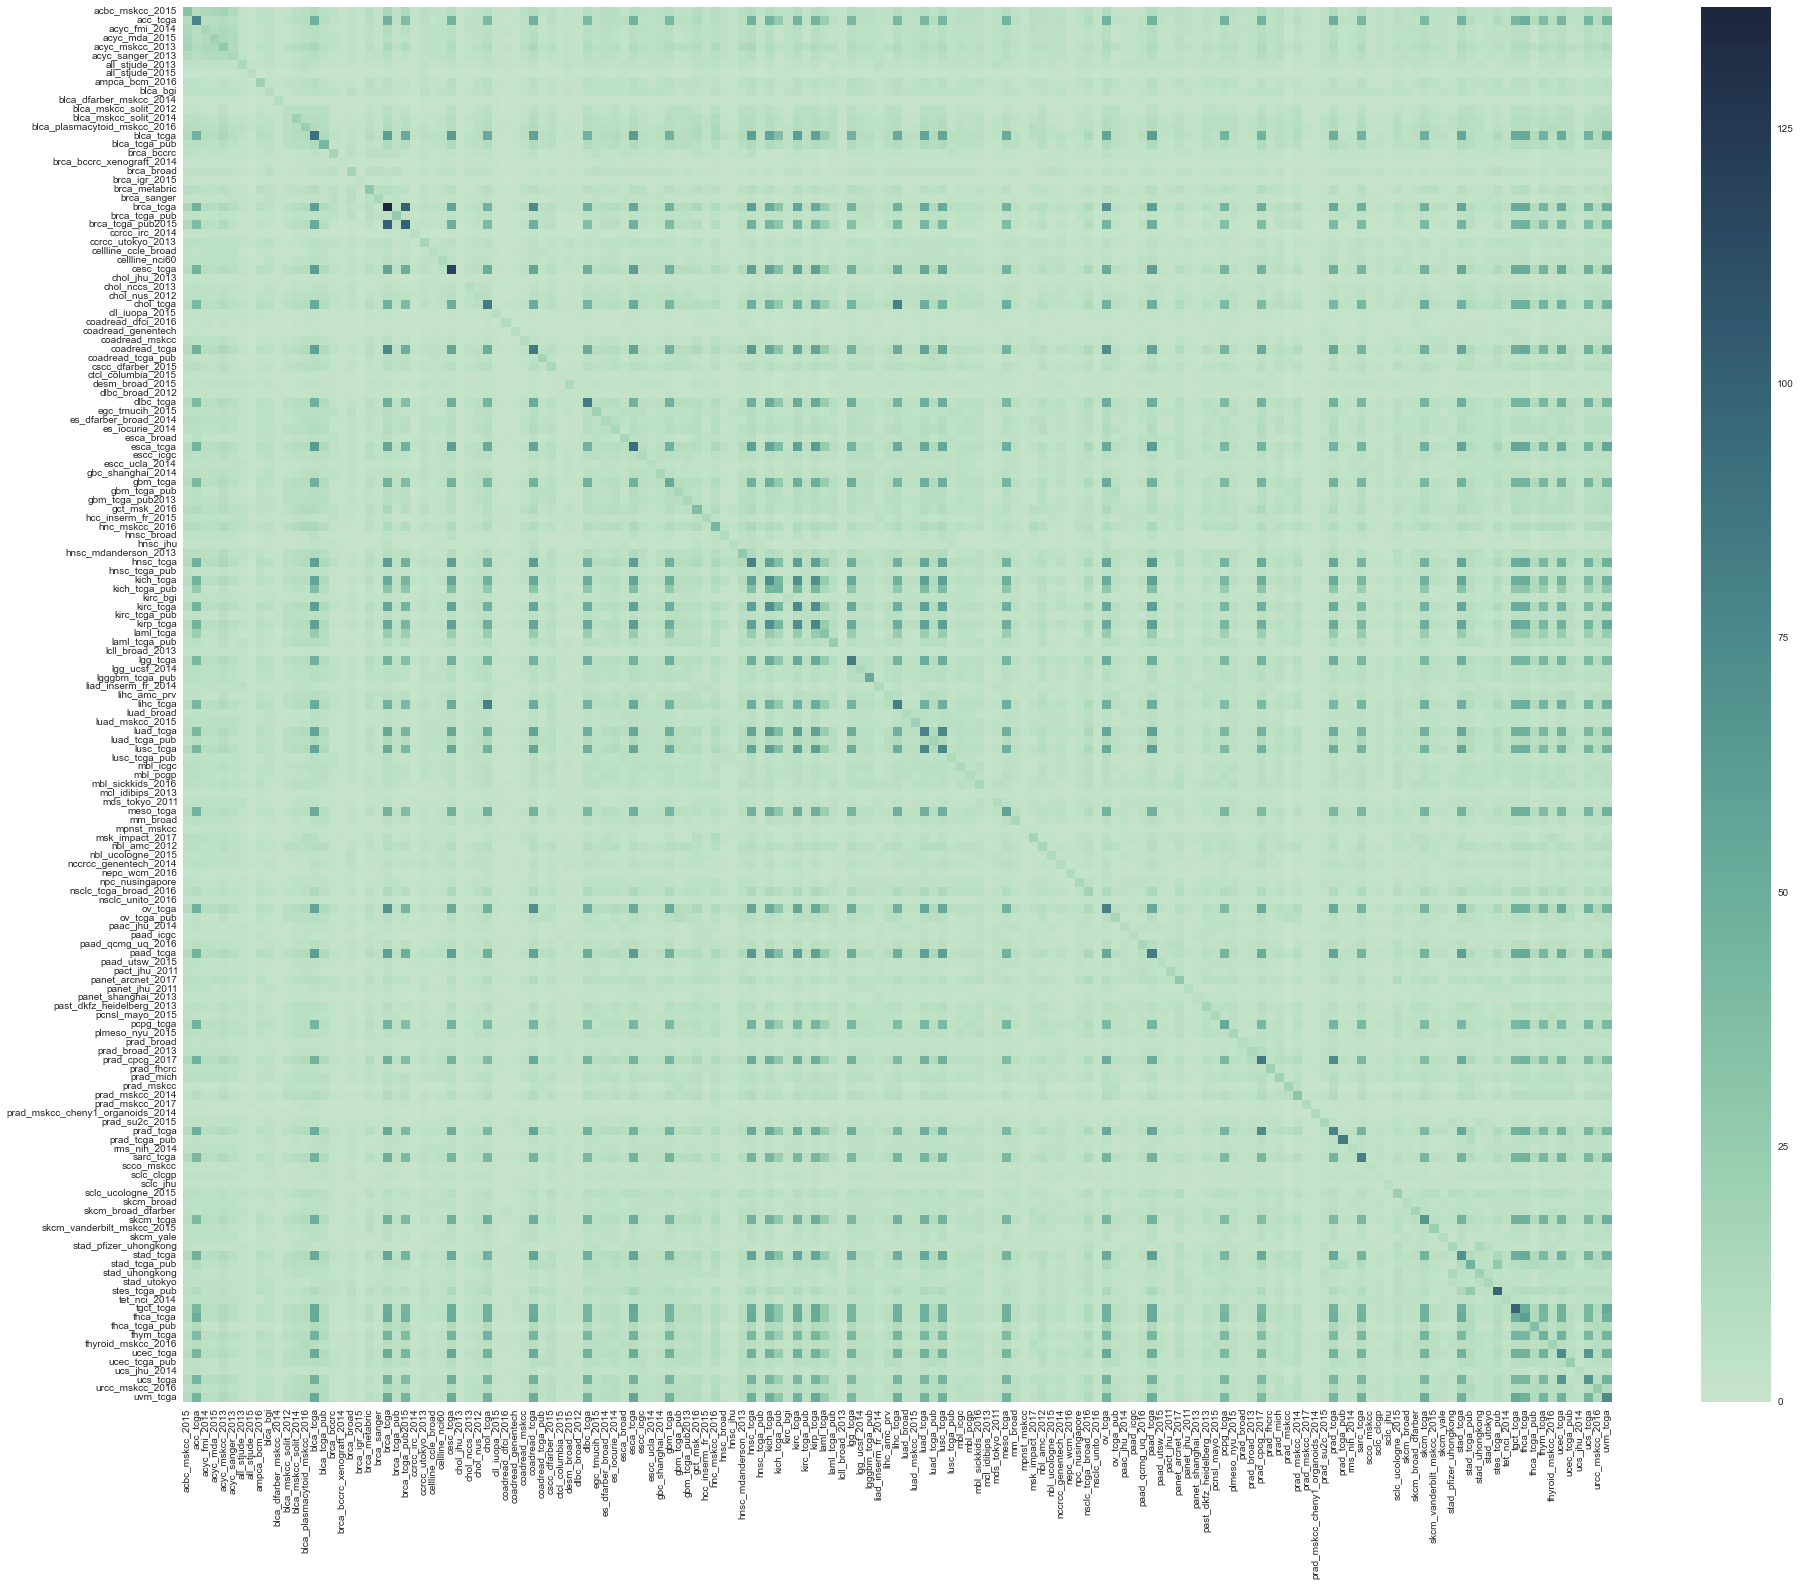

In [284]:
fig, ax = plt.subplots(figsize=(32,25))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(n_common_attributes, cmap=cmap)

##Normalize common attributes between study by dividing by 
##min(n_attributes_study1, n_attributes_study2)

In [281]:
study_names = list(study_data_combined.T)
n_studies = len(study_names)
n_common_attributes = pd.DataFrame(index=study_names, columns=study_names)
n_common_attributes = n_common_attributes.fillna(0.0)
n_attribute_dist = []
#n_common_attributes = np.zeros([n_studies, n_studies])

for i in range(n_studies):
    for j in range(n_studies):
        #n_common_attributes[i, j] = sum((study_data_combined.T[study_names[i]]>0) & (study_data_combined.T[study_names[j]]>0))
        n_attributes = sum((study_data_combined.T[study_names[i]]>0) & (study_data_combined.T[study_names[j]]>0))
        min_attributes = min([sum(study_data_combined.T[study_names[i]]>0), sum(study_data_combined.T[study_names[j]]>0)])
        n_common_attributes.ix[i, study_names[j]] = n_attributes/float(min_attributes)
        if j>i:
            n_attribute_dist.append(n_attributes)

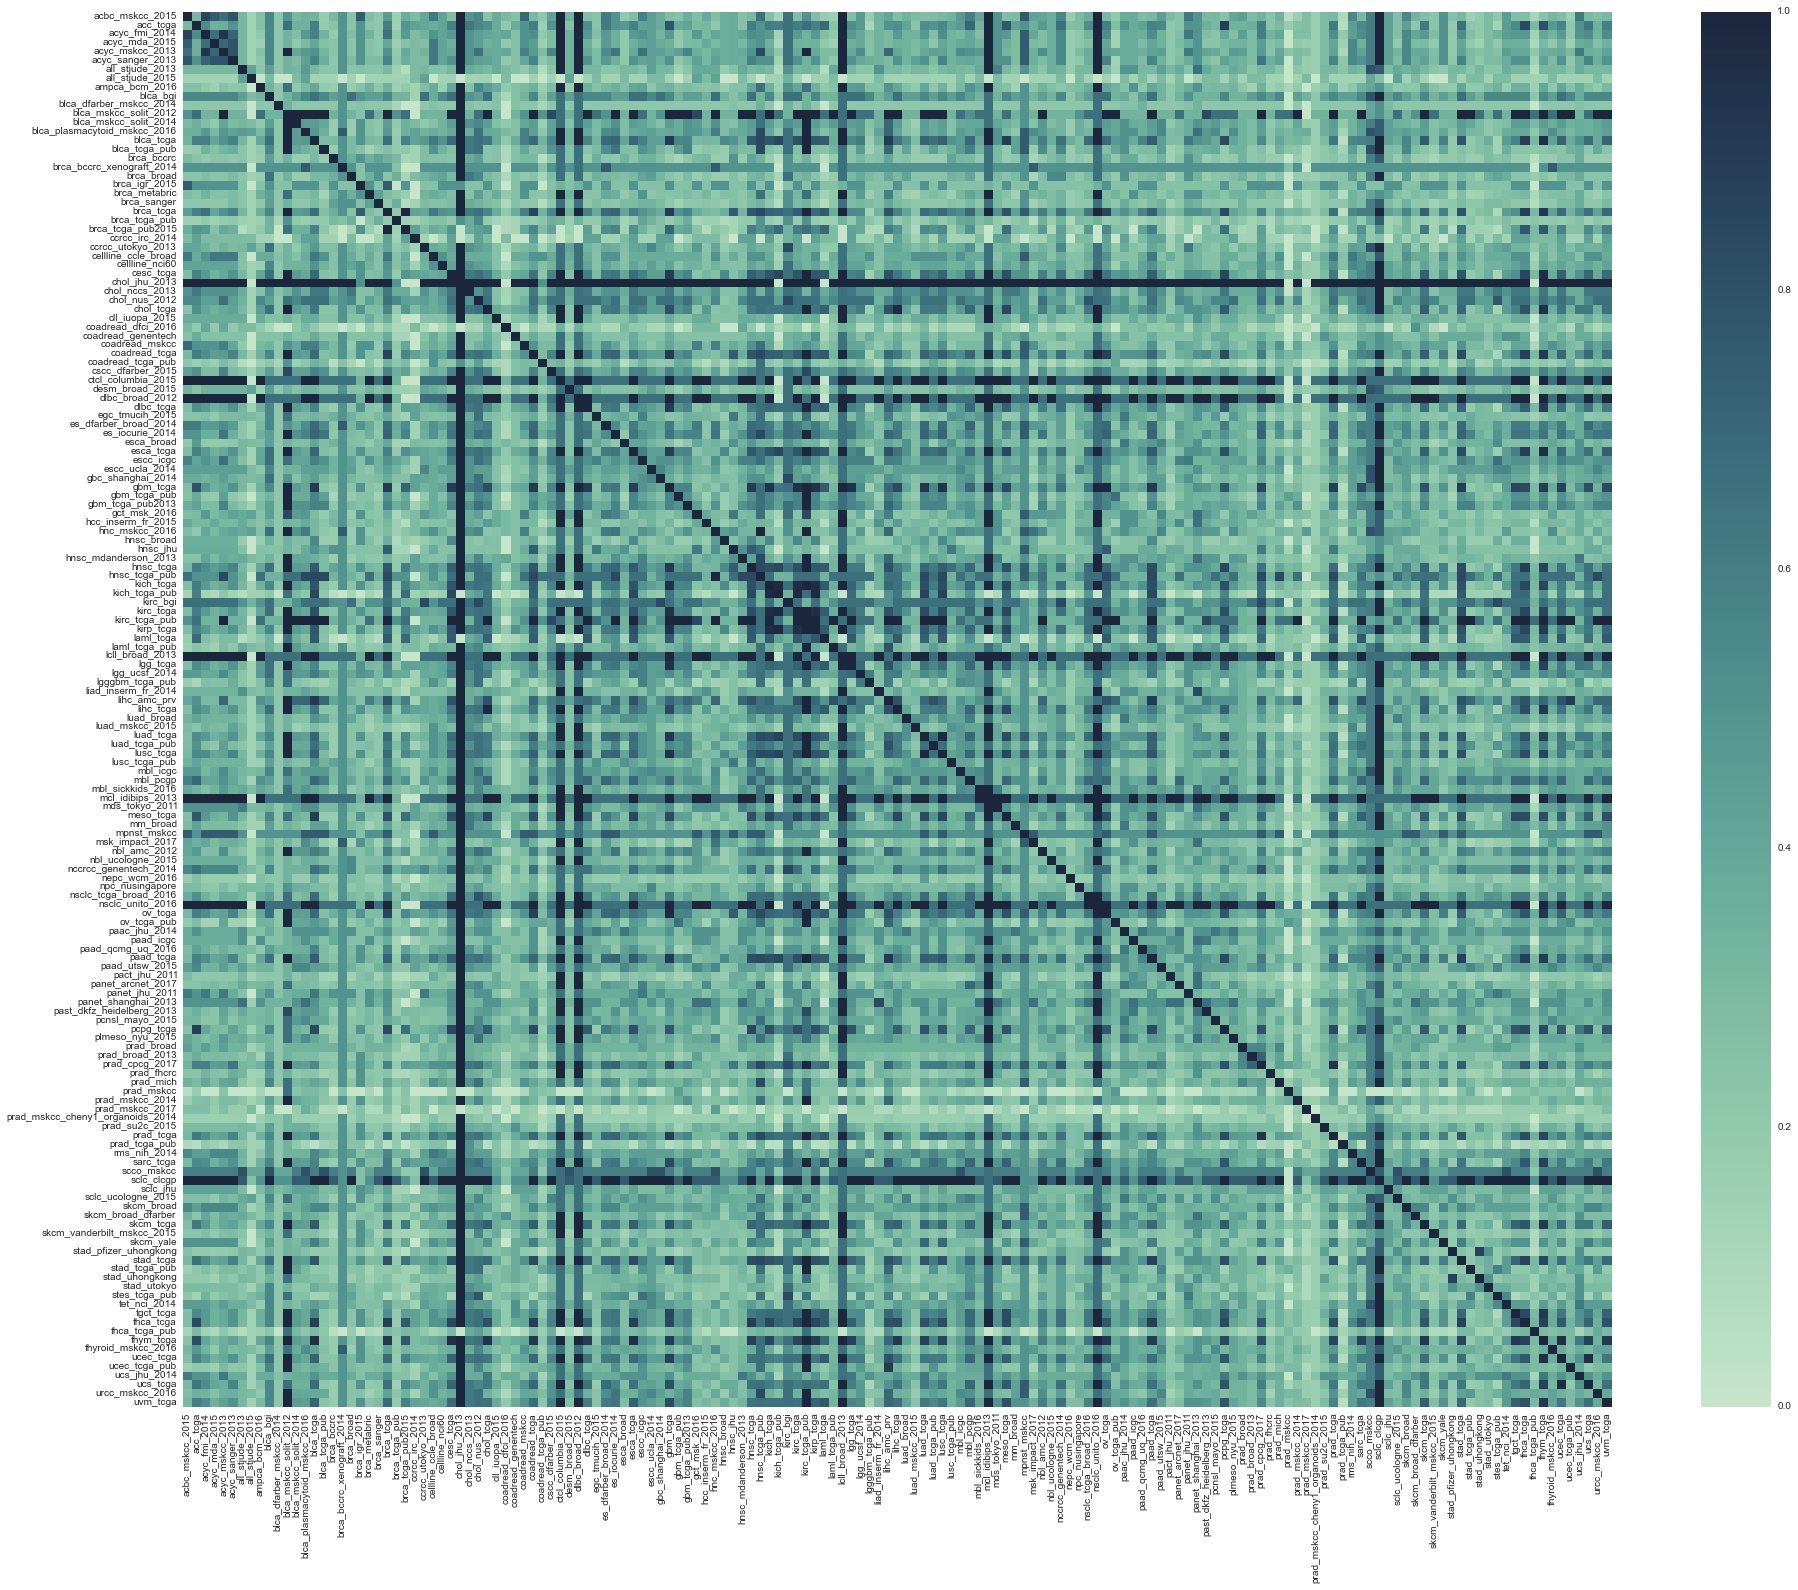

In [282]:
fig, ax = plt.subplots(figsize=(32,25))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(n_common_attributes, cmap=cmap)